<a href="https://colab.research.google.com/github/Terry-Migwi/Amazon_Reviews_Sentiment_Analysis/blob/main/Bigrams_CDs_%26_Vinyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Specifying the Data Analytic question

The objective of this notebook is to build a `bigram network`. Bigram Networks are a type of statistical model that predicts the probability of a word in a sequence based on the previous word. It considers a pair of consecutive words (bigrams) and estimates the likelihood of encountering a specific word given the preceeding word in a text or sentence.



In [ ]:
# import libraries for data manipulation and visualization

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools

# Use regular expression
import re

# Get a bunch of tools from nltk for nlp
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

# tools for sentiment analysis
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
from nltk.probability import FreqDist

# Import bigrams
from nltk import bigrams

# Get English stopwords
en_stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Read the Data

In [ ]:
# First upload a review data set to the runtime

# Initiate an empty list to store sliced dataframes (chunks)
myList = []

# Specify the chunksize
chunksize = 1000

# nrows should be more than the total number of rows in the whole file
for chunk in pd.read_json('/content/drive/MyDrive/Colab Notebooks/CDs_and_Vinyl_5.json.gz', compression='gzip', nrows=10000000, lines=True, chunksize=chunksize):
    myList.append(chunk)

# put the chunks together
myData = pd.concat(myList,axis=0)

## Check the data

In [ ]:
# preview the top of the data
myData.head(3)

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN


In [ ]:

pd.set_option("display.max_colwidth", -1)

<ipython-input-5-a09e5efec013>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


In [ ]:
myData['reviewText']

0          Love it!!  Great seller!                                                                                                                                                                                                                                                                                                                                                                                                                                           
1          One of my very favourite albums from one of my very favourite singers.  I was happy to see I could replace the old worn cassettes from years ago.                                                                                                                                                                                                                                                                                                                  
2          THank you Jesus Lord God, that brother Green's music is still s

In [ ]:

pd.set_option("display.max_colwidth", -1)
myData['summary']

<ipython-input-10-62fcb2ca0f62>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option("display.max_colwidth", -1)


0          Five Stars                                                                                 
1          One of my very favourite albums from one of my very favourite singers                      
2          Five Stars                                                                                 
3          forgot but I figured on some of these artists seems like one good album and all good albums
4          and I have loved every album he did                                                        
                          ...                                                                         
1443750    My favorite cut is the cover of "(Ghost) Riders In The ...                                 
1443751    Three Stars                                                                                
1443752    The sound quality and number of hits                                                       
1443753    5fer                                                          

In [ ]:
myData['overall'].value_counts()

5    968755
4    274731
3    110407
2    46367 
1    43495 
Name: overall, dtype: int64

<Axes: xlabel='overall', ylabel='count'>

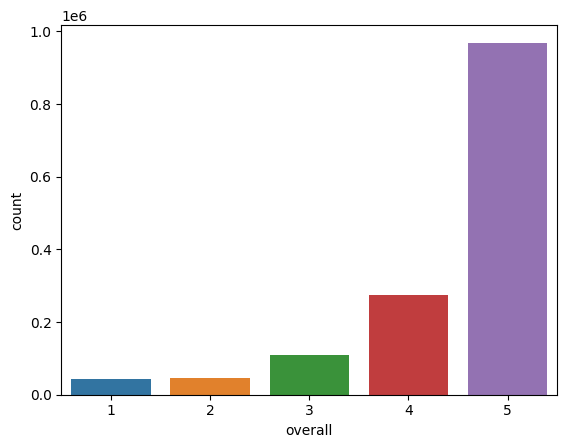

In [ ]:
# distribution of reviews
sns.countplot(data = myData, x = 'overall')

<Axes: xlabel='verified', ylabel='count'>

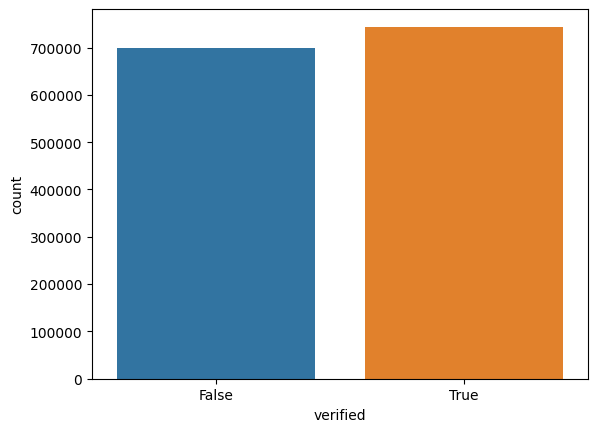

In [ ]:
# plot verified and non-verified
sns.countplot(data = myData, x = 'verified')

In [ ]:
# only keep the verified reviews
myData = myData[myData['verified'] == True]
len(myData)

743956

## Text Cleaning

In [ ]:
# Operate the data cleaning process on dataframe directly

# Make sure the column 'reviewText' is of string type
myData['reviewText'] = myData['reviewText'].apply(str)
# Remove special characters
myData['clean_review'] = myData['reviewText'].str.replace("[^a-zA-Z']"," ",regex=True)
# Remove leading and trailing whitespaces
myData['clean_review'] = myData['clean_review'].str.strip()

## Sentiment Polarity

In [ ]:
# Define functions for sentiment polarity

def getSentScore(text):
  myScore = sia.polarity_scores(text)['compound']
  return(myScore)

In [ ]:
# Generate a new column to store the sentiment scores

myData['sentiment_score'] = myData.apply(lambda x: getSentScore(x['clean_review']), axis=1)

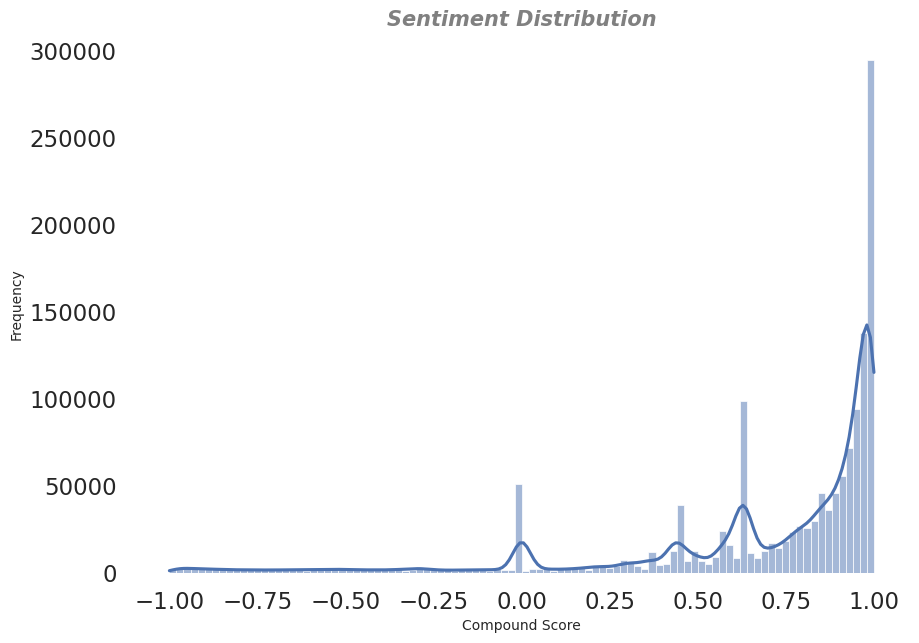

In [ ]:
# Visualise the sentiment score distribution

# Set a more specific style
sns.set_theme(style="white", context="talk")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,7))

# Use histplot
sns.histplot(x="sentiment_score",
             data=myData,
             # kernal density estimation
             kde=True,
             # control the bin width
             binwidth=0.02
             )

# Add label to horiztontal axis
ax.set_xlabel("Compound Score", fontsize = 10)

# Remove ylabel
ax.set_ylabel("Frequency", fontsize = 10)

# Add a title
ax.set_title("Sentiment Distribution", fontsize = 15, fontstyle = 'oblique', fontweight = 'heavy', color = 'grey')

# Remove the border line
sns.despine(left=True, bottom=True)

# Save the figure
# plt.savefig("sentDist.png",
#             bbox_inches="tight",
#             dpi=200)

# Show nicely in the notebook
plt.show()

## Separate Positive and Negative Reviews

In [ ]:
# Define a functuon to seperate positive and negative

def getSentCat(text):
  myScore = sia.polarity_scores(text)['compound']
  if myScore > 0:
    myCat = 'positive'
  elif myScore < 0:
    myCat = 'negative'
  else:
    myCat = 'neutral'
  return(myCat)

In [ ]:
# Generate a new column to store the sentiment categories

myData['sentiment_cat'] = myData.apply(lambda x: getSentCat(x['clean_review']), axis=1)

In [ ]:
# preview the data
myData.head(3)

,reviewerID,asin,reviewerName,verified,reviewText,overall,reviewTime,summary,unixReviewTime,style,vote,image,clean_review,sentiment_score,sentiment_cat
0,A1H1DL4K669VQ9,0001393774,Judith Paladino,True,Love it!! Great seller!,5,"04 29, 2016",Five Stars,1461888000,NaN,NaN,NaN,Love it Great seller,0.8519,positive
1,A3V5XBBT7OZG5G,0001393774,gflady,True,One of my very favourite albums from one of my...,5,"02 23, 2016",One of my very favourite albums from one of my...,1456185600,NaN,NaN,NaN,One of my very favourite albums from one of my...,0.3612,positive
2,A3SNL7UJY7GWBI,0001393774,Lady Leatherneck,True,"THank you Jesus Lord God, that brother Green's...",5,"02 11, 2016",Five Stars,1455148800,NaN,NaN,NaN,THank you Jesus Lord God that brother Green's...,0.5574,positive


In [ ]:
# explore the categories created
myData.dtypes

reviewerID          object
asin                object
reviewerName        object
verified              bool
reviewText          object
overall              int64
reviewTime          object
summary             object
unixReviewTime       int64
style               object
vote                object
image               object
clean_review        object
sentiment_score    float64
sentiment_cat       object
dtype: object

In [ ]:
# convert sentiment cat to categorical data
myData['sentiment_cat'] = myData['sentiment_cat'].astype('category')

In [ ]:
myData['sentiment_cat'].unique()

['positive', 'neutral', 'negative']
Categories (3, object): ['negative', 'neutral', 'positive']

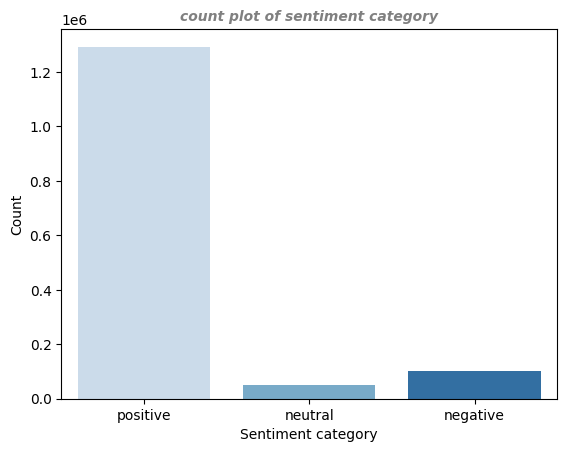

In [ ]:
# countplot of categories
chart2 = sns.countplot(x = myData['sentiment_cat'], palette = 'Blues')
chart2.set_title("count plot of sentiment category", fontdict={'size': 10, 'style':'oblique', 'weight': 'heavy', 'color': 'grey'})
chart2.set_xlabel("Sentiment category", fontsize = 10)
chart2.set_ylabel("Count", fontsize = 10)
plt.show()

In [ ]:
# compare categories created with overall column
# convert overall column to categorical data
myData['overall'] = myData['overall'].astype('category')

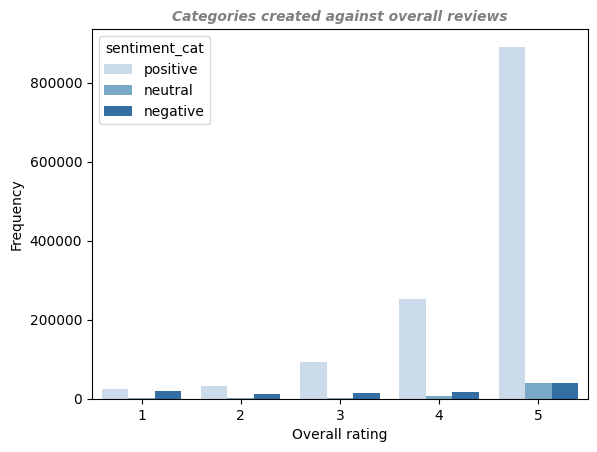

In [ ]:
chart3 = sns.countplot(data = myData, x ='overall', hue = 'sentiment_cat', palette = 'Blues')
chart3.set_title("Categories created against overall reviews", fontdict={'size': 10, 'style':'oblique', 'weight': 'heavy', 'color': 'grey'})
chart3.set_xlabel("Overall rating", fontsize = 10)
chart3.set_ylabel("Frequency", fontsize = 10)
plt.show()

In [ ]:
# convert overall column to categorical data
myData['overall'] = myData['overall'].astype('int')

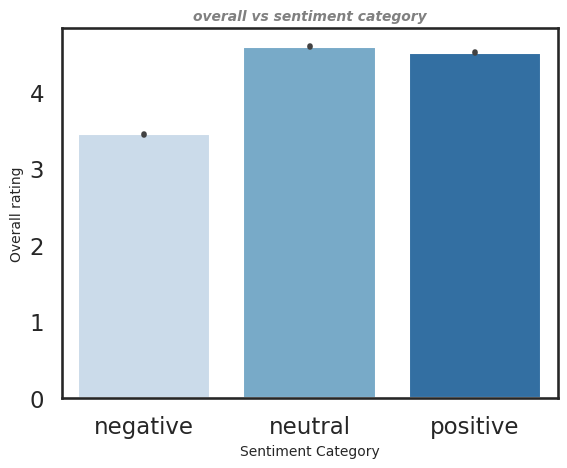

In [ ]:
# import matplotlib.pyplot as plt
chart1 = sns.barplot(data=myData, x="sentiment_cat", y="overall", palette = 'Blues')
chart1.set_title("overall vs sentiment category", fontsize = 10, fontstyle = 'oblique', fontweight = 'heavy', color = 'grey')
# Add label to horiztontal axis
chart1.set_xlabel("Sentiment Category", fontsize = 10)
chart1.set_ylabel("Overall rating", fontsize = 10)
plt.show()

# f, ax = plt.subplots(figsize=(7,5))

# sns.catplot(data = myData, x="sentiment_cat", y="overall", kind="bar", palette = 'Blues')


# # Add label to horiztontal axis
# ax.set_xlabel("Sentiment Category")

# # Remove ylabel
# ax.set_ylabel("Overall rating")

# # Add a title
# ax.set_title("overall rating vs sentiment category", fontdict={'size': 10, 'style':'oblique', 'weight': 'heavy', 'color': 'grey'})

# # Remove the border line
# sns.despine(left=True, bottom=True)

# plt.show()

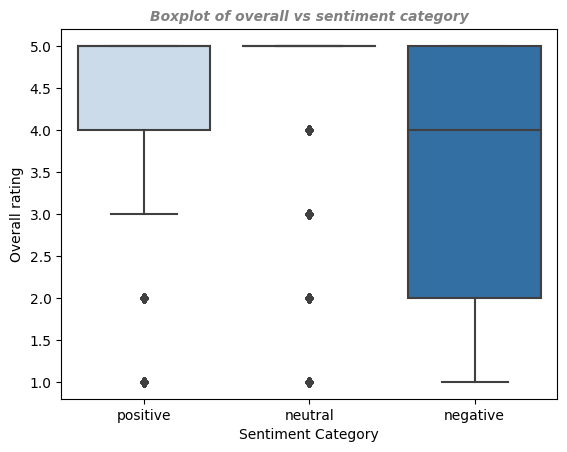

In [ ]:
chart1 = sns.boxplot(data=myData, x="sentiment_cat", y="overall", palette = 'Blues')
chart1.set_title("Boxplot of overall vs sentiment category", fontsize = 10, fontstyle = 'oblique', fontweight = 'heavy', color = 'grey')
# Add label to horiztontal axis
chart1.set_xlabel("Sentiment Category", fontsize = 10)
chart1.set_ylabel("Overall rating", fontsize = 10)
plt.show()

### Create Bigrams

Get the words for positive sentiments only

In [ ]:
# Subset the data
myDataPos = myData[myData['sentiment_cat']=='positive']

In [ ]:
# Generate lists of bigrams for network visualisation
myTokensPos = [word_tokenize(tweet) for tweet in myDataPos['clean_review']]

In [ ]:
# convert words to lower case, remove stop words, and cap word length to greater than three
myTokensPos_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensPos]

In [ ]:
# convert tokens to bigrams
myBigramPos = [list(bigrams(tweet)) for tweet in myTokensPos_noSW_noCase]


In [ ]:
#
myBigramListPos = list(itertools.chain.from_iterable(myBigramPos))


In [ ]:
# obtain bigrams frequency distribution
bigramFreqPos = FreqDist(myBigramListPos)

Get the words with negative sentiment

In [ ]:
# Subset the data
myDataNeg = myData[myData['sentiment_cat']=='negative']

In [ ]:
# tokenize negative tweets
myTokensNeg = [word_tokenize(tweet) for tweet in myDataNeg['clean_review']]

In [ ]:
# convert words to lowercase, remove stopwords, and cap word length to > three letters
myTokensNeg_noSW_noCase = [[word.lower() for word in tweet if (word.lower() not in en_stopwords) and (len(word)>3)] for tweet in myTokensNeg]


In [ ]:
# create bigrams
myBigramNeg = [list(bigrams(tweet)) for tweet in myTokensNeg_noSW_noCase]


In [ ]:
# Generate lists of bigrams for network visualisation

myBigramListNeg = list(itertools.chain.from_iterable(myBigramNeg))

In [ ]:
# create frequency distribution for the bigrams
bigramFreqNeg = FreqDist(myBigramListNeg)

In [ ]:
# import libraries to create the network
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [ ]:
# Prepare the bigram network for positive reviews

# Collect the result
myResultPos = bigramFreqPos.most_common(30)
# Construct the network
G_pos = nx.DiGraph()
# Create connections between nodes
for i in myResultPos:
    G_pos.add_edge(i[0][0], i[0][1], weight=(i[1]))


In [ ]:
# prepare the bigram network for negative reviews

# Collect the result
myResultNeg = bigramFreqNeg.most_common(50)
# Construct the network
G_neg = nx.DiGraph()
# Create connections between nodes
for i in myResultNeg:
    G_neg.add_edge(i[0][0], i[0][1], weight=(i[1]))

<ipython-input-26-6872c4c6b063>:11: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_pos = graphviz_layout(G_pos, prog="neato")
<ipython-input-26-6872c4c6b063>:34: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos_neg = graphviz_layout(G_neg, prog="neato")


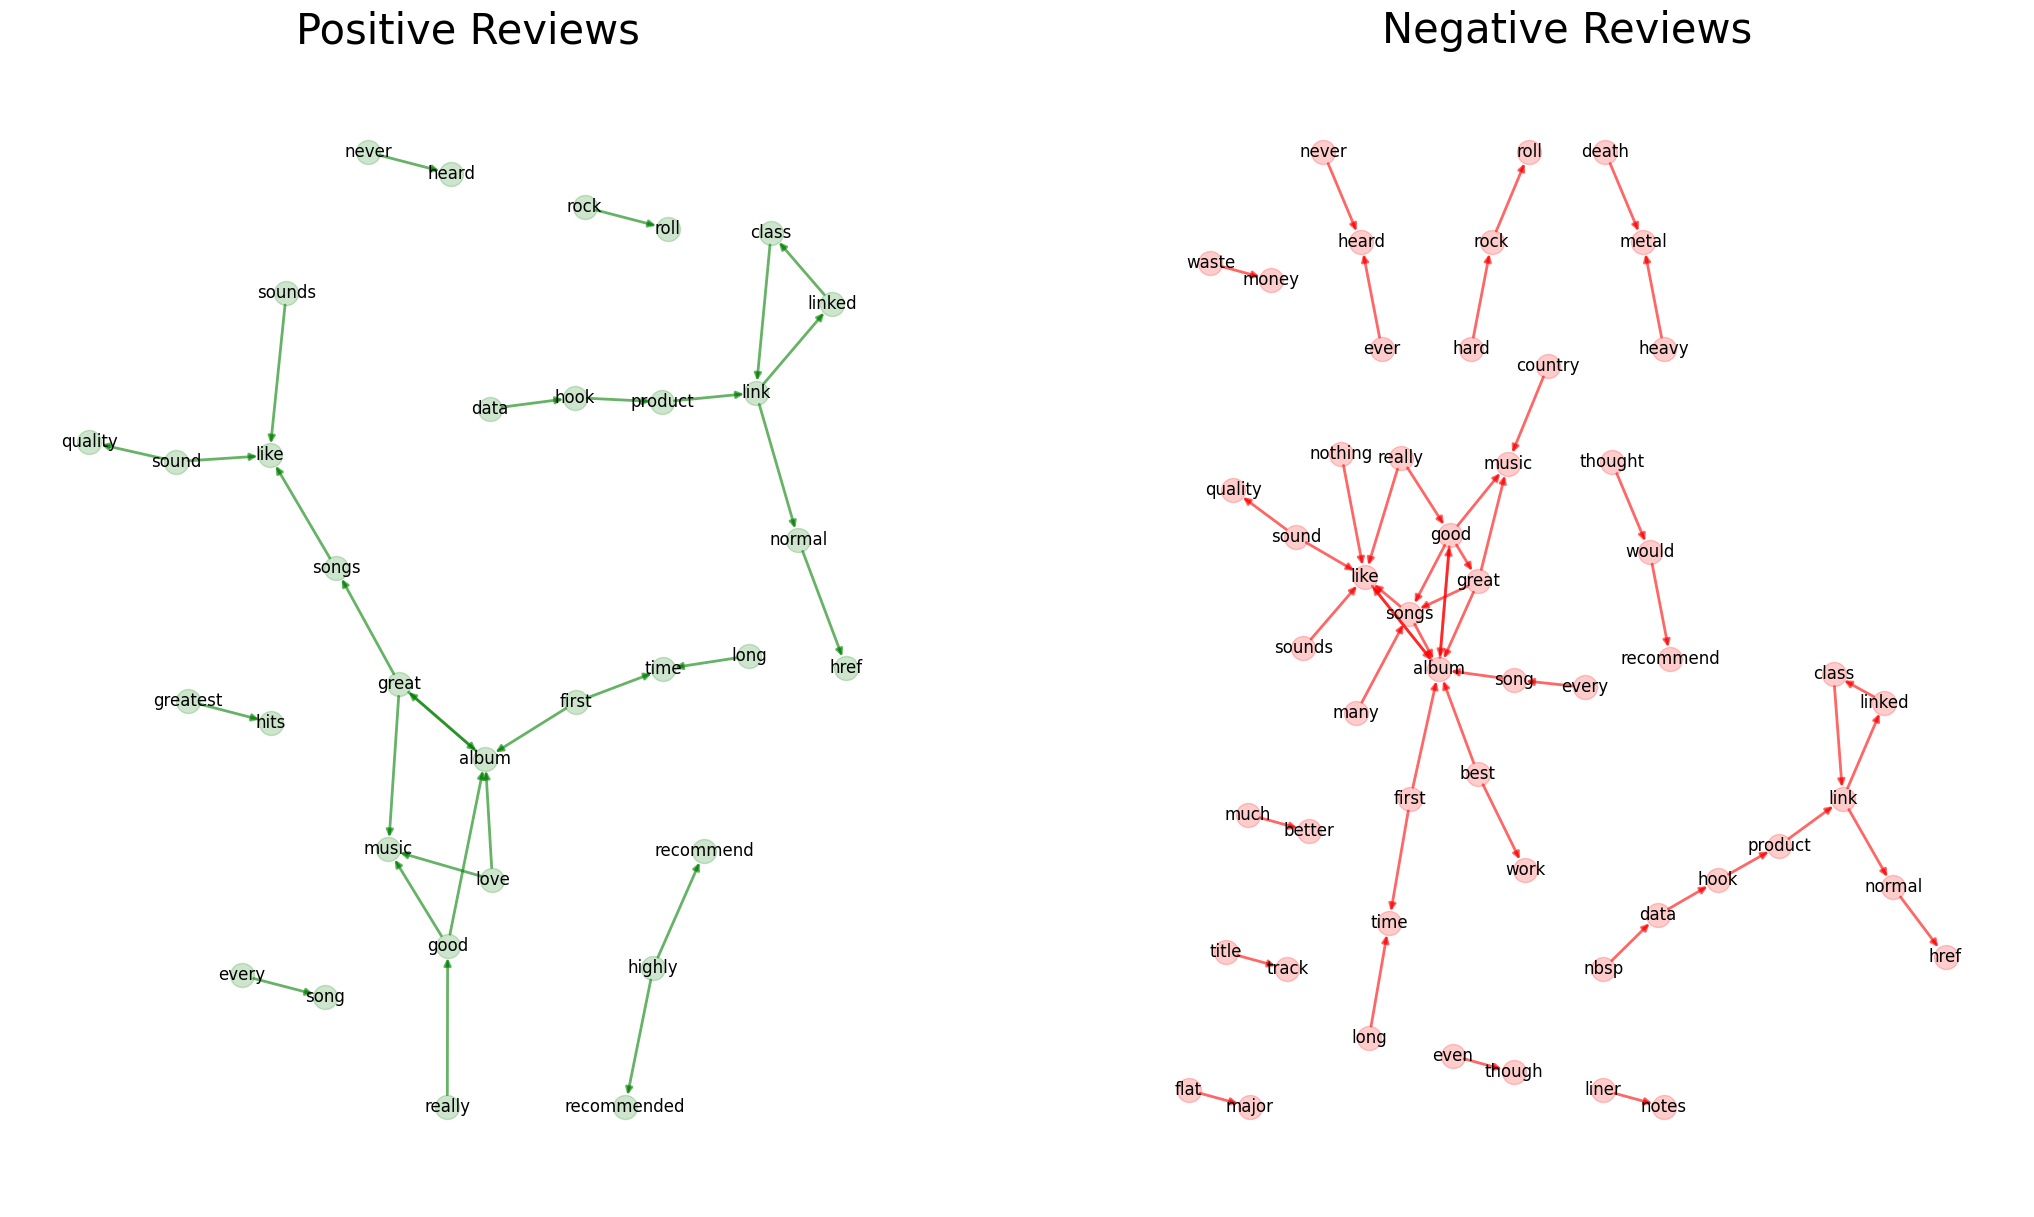

In [ ]:
#  Visualisation

import seaborn as sns

# set up the figure
f, ax = plt.subplots(1,2,figsize=(26, 15))

# For positive subplot

# use another layout
pos_pos = graphviz_layout(G_pos, prog="neato")

# store the node label information
labels_pos = {}
for node in G_pos.nodes:
    labels_pos[node] = node

# Plot edges
nx.draw_networkx_edges(G_pos, pos_pos, width=2, alpha=0.6, edge_color="green", ax=ax[0])

# Plot nodes
nx.draw_networkx_nodes(G_pos, pos_pos, alpha=0.2, label=True, node_color="green", ax=ax[0])

# Add labels
nx.draw_networkx_labels(G_pos, pos_pos, labels_pos, ax=ax[0])

# Turn off the axis
ax[0].axis("off")
ax[0].set_title('Positive Reviews',fontsize=30)

# For negative subplot

# use another layout
pos_neg = graphviz_layout(G_neg, prog="neato")

# store the node label information
labels_neg = {}
for node in G_neg.nodes:
    labels_neg[node] = node

# Plot edges
nx.draw_networkx_edges(G_neg, pos_neg, width=2, alpha=0.6, edge_color="red", ax=ax[1])

# Plot nodes
nx.draw_networkx_nodes(G_neg, pos_neg, alpha=0.2, label=True, node_color="red", ax=ax[1])

# Add labels
nx.draw_networkx_labels(G_neg, pos_neg, labels_neg, ax=ax[1])

# Turn off the axis
ax[1].axis("off")
ax[1].set_title('Negative Reviews',fontsize=30)

# Save the figure
plt.savefig('directedBigram.png',
            bbox_inches='tight',
            dpi=400)

# Show nicely in the notebook
plt.show()

